In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Loads feature data
X_train = pd.read_csv('train_reduced_gB4.csv')
X_val = pd.read_csv('validation_reduced_gB4.csv')
X_test = pd.read_csv('test_reduced_gB4.csv')

# Load target data
Y_train = pd.read_csv('train_target_gB4.csv').squeeze()
Y_val = pd.read_csv('validation_target_gB4.csv').squeeze()
Y_test = pd.read_csv('test_target_gB4.csv').squeeze()

# Load linear regression predictions
lr_pred_df = pd.read_csv('LR_pred_gB4.csv')
lr_pred = lr_pred_df.iloc[:, 0]

# Tune the number of trees (n_estimators) for Random Forest using R^2 score on validation set
best_r2 = float('-inf')
best_n = 10
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    preds = rf.predict(X_val)
    r2 = r2_score(Y_val, preds)
    if r2 > best_r2:
        best_r2 = r2
        best_n = n

print(f"Best n_estimators: {best_n} with R^2: {best_r2:.4f}")

Best n_estimators: 90 with R^2: 0.4480


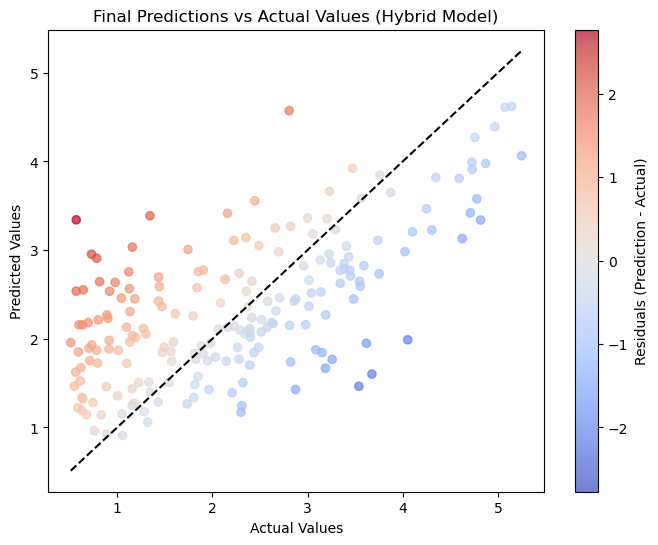

R² Score: 0.7729
Mean Absolute Error (MAE): 0.3794
Mean Squared Error (MSE): 0.3313
Root Mean Squared Error (RMSE): 0.5756


In [6]:
# Merges the training and validation feature sets
X_trainval = pd.concat([X_train, X_val], ignore_index=True)
Y_trainval = pd.concat([Y_train, Y_val], ignore_index=True)

# Train final model with the best n_estimators
final_rf = RandomForestRegressor(n_estimators=best_n, random_state=42)
final_rf.fit(X_trainval, Y_trainval)
X_final_preds = final_rf.predict(X_test)
X_final_residuals = Y_test - X_final_preds

# Combine and plot linear regression predictions with predicted residuals as a heatmap of residuals
final_predictions = lr_pred + X_final_residuals
residuals_plot = X_final_preds - Y_test

plt.figure(figsize=(8, 6))
sc = plt.scatter(Y_test, X_final_preds, c=residuals_plot, cmap='coolwarm', alpha=0.7, vmin=-np.max(np.abs(residuals_plot)), vmax=np.max(np.abs(residuals_plot)))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Final Predictions vs Actual Values (Hybrid Model)')
plt.colorbar(sc, label='Residuals (Prediction - Actual)')
plt.show()

# Calculate diagnostic metrics
r2 = r2_score(Y_test, final_predictions)
mae = mean_absolute_error(Y_test, final_predictions)
mse = mean_squared_error(Y_test, final_predictions)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
